# 1. Date and time Data types

In [1]:
# TS: is any dataset, where data is observed or measured at many points in time.
# Time points usually occur at regular intervals, such as every minute, every day, every month or every year.
# TS is a very important form of structured data in many fields, such as finance and economics.
# We will focus on handling 'data' and 'time' data types.
# Data and Time data are used as the index for Time series.

In [19]:
# Import libraries ...
import pandas as pd
from datetime import datetime

In [5]:
# Current time ...
time_now = datetime.now()
time_now

datetime.datetime(2022, 7, 17, 10, 35, 17, 604126)

In [10]:
# Current day, month, year ...
time_now.hour
time_now.day
time_now.month
time_now.year

2022

In [16]:
# Difference between two days ...
time1 = datetime(1946,1,1)
time2 = datetime(2022,1,1)
time_difference = time2-time1
time_difference
# or
time_difference.days

27759

In [18]:
# Changing the time date ...
from datetime import timedelta

time1 + timedelta(23)

#
time2 - timedelta(23)

datetime.datetime(2021, 12, 9, 0, 0)

# 2. Converting Between String and Datetime

In [20]:
# How to convert between 'string' and 'datetime'
# To prepare TS for analysis, the dates need to be formatted in 'datetime data type'.

# Check the data type for the date column in the TS.
# How to 'convert the date; into the proper 'datetime data type'.


In [40]:
# Example ...
T = '2022,09,12'
type(T)
T # its a string

'2022,09,12'

In [41]:
# Convert 'str' to 'datetime' ...
forma = "%Y,%m,%d"
time1 = datetime.strptime(T, forma)
time1

datetime.datetime(2022, 9, 12, 0, 0)

In [43]:
# Example ...
time = '2022-6-1'
time

'2022-6-1'

In [45]:
# Convert 'str' to 'datetime' ...
forma = "%Y-%m-%d"
time1 = datetime.strptime(time, forma)
time1

datetime.datetime(2022, 6, 1, 0, 0)

In [50]:
# Example DF ...
df = pd.read_csv('data/ex8.csv')
df.head()

,date,google,apple
0,30-Apr-21,2410.12,131.24
1,29-Apr-21,2429.89,133.25
2,28-Apr-21,2379.91,133.35
3,27-Apr-21,2307.12,134.16
4,26-Apr-21,2326.74,134.49


In [52]:
# Check the type of the column ...
df.date
df.date.dtype # its an 'object'

dtype('O')

In [56]:
# Convert it to 'datetime' ...
df['date'] = pd.to_datetime(df['date'])
df.date # Converted to the datetime

0   2021-04-30
1   2021-04-29
2   2021-04-28
3   2021-04-27
4   2021-04-26
5   2021-04-23
6   2021-04-22
7   2021-04-21
8   2021-04-20
Name: date, dtype: datetime64[ns]

In [58]:
# Check the -DF- type ...
df.dtypes # date: datetime64[ns]


date      datetime64[ns]
google           float64
apple            float64
dtype: object

# 3. Basics of Time Series

In [59]:
# Basics TS operations.
# TS is a DF that is indexed with timestamp.
# Timestamps need to be recognized by pandas as datetime objects.

In [65]:
# Example ...
TS = pd.read_csv('data/ex15.csv')
TS.head()

,date,google,apple
0,30-Apr-19,2410.12,131.24
1,29-May-19,2429.89,133.25
2,28-Jun-19,2379.91,133.35
3,27-Jul-19,2307.12,134.16
4,26-Apr-20,2326.74,134.49


In [66]:
# Check date if its string or datetime ...
TS.dtypes

date       object
google    float64
apple     float64
dtype: object

In [67]:
# Convert it to datetime ...
TS['date'] = pd.to_datetime(TS['date'])
TS.date 

0    2019-04-30
1    2019-05-29
2    2019-06-28
3    2019-07-27
4    2020-04-26
5    2020-05-23
6    2020-06-24
7    2020-07-20
8    2021-04-20
9    2021-05-30
10   2021-06-29
11   2021-07-28
12   2021-04-27
13   2022-05-26
14   2022-06-23
15   2022-07-22
Name: date, dtype: datetime64[ns]

In [68]:
# Check it again ...
TS.dtypes

date      datetime64[ns]
google           float64
apple            float64
dtype: object

In [69]:
# Display it again ...
TS.head()

,date,google,apple
0,2019-04-30,2410.12,131.24
1,2019-05-29,2429.89,133.25
2,2019-06-28,2379.91,133.35
3,2019-07-27,2307.12,134.16
4,2020-04-26,2326.74,134.49


In [71]:
# set the 'date' as index ...
TS = TS.set_index('date')
TS.head()

,google,apple
date,,
2019-04-30,2410.12,131.24
2019-05-29,2429.89,133.25
2019-06-28,2379.91,133.35
2019-07-27,2307.12,134.16
2020-04-26,2326.74,134.49


In [72]:
# TS analysis steps ...
# 1. Reading the TS into pandas DataFrame.
# 2. Converting the date column into datetime format.
# 3. Setting the date column to the index.

In [77]:
# The three (03) steps in one line code ...
TS = pd.read_csv('data/ex15.csv',
                 parse_dates =['date'],
                 index_col = 'date')

TS.head(3)

,google,apple
date,,
2019-04-30,2410.12,131.24
2019-05-29,2429.89,133.25
2019-06-28,2379.91,133.35


In [87]:
# Select a specific data in the 'TS' ...
TS.loc['2021'] # TS.loc['2021-04'] 

,google,apple
date,,
2021-04-20,2293.63,132.88
2021-05-30,2410.12,131.24
2021-06-29,2429.89,133.25
2021-07-28,2379.91,133.35
2021-04-27,2307.12,134.16


In [88]:
#
TS.loc['2019':'2021'] # TS.loc[:'2021'] 

C:\Users\xps\AppData\Local\Temp\ipykernel_19144\111852787.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  TS.loc['2019':'2021']


,google,apple
date,,
2019-04-30,2410.12,131.24
2019-05-29,2429.89,133.25
2019-06-28,2379.91,133.35
2019-07-27,2307.12,134.16
2020-04-26,2326.74,134.49
2020-05-23,2315.30,134.09
2020-06-24,2267.92,131.72
2020-07-20,2293.29,133.27
2021-04-20,2293.63,132.88


In [89]:
# Check for duplicate date ...
TS.index.is_unique

True

# 4. Generating Date Ranges

In [90]:
# How to "generate date ranges" from TS.
# Sometimes, you need to create your own date index:
            # To add a date index for a dataset without one.
            # To replace an old date index with a new one.

In [91]:
df = pd.read_csv('data/ex16.csv')
df

,google,apple
0,2410.12,131.24
1,2429.89,133.25
2,2379.91,133.35
3,2307.12,134.16
4,2326.74,134.49
5,2315.30,134.09
6,2267.92,131.72
7,2293.29,133.27
8,2293.63,132.88
9,2410.12,131.24


In [92]:
# Adding an index to the DF ...
index = pd.date_range(start='2020-05-01', end='2020-05-15') #,periods=15
index

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15'],
              dtype='datetime64[ns]', freq='D')

In [93]:
# Add/set the index to the TS ...
TS = df.set_index(index)
TS

,google,apple
2020-05-01,2410.12,131.24
2020-05-02,2429.89,133.25
2020-05-03,2379.91,133.35
2020-05-04,2307.12,134.16
2020-05-05,2326.74,134.49
2020-05-06,2315.30,134.09
2020-05-07,2267.92,131.72
2020-05-08,2293.29,133.27
2020-05-09,2293.63,132.88
2020-05-10,2410.12,131.24


In [95]:
# By last day month business (BM) ...
index_last = pd.date_range('2020-01-01',
                           '2020-12-31',
                           freq='BM')
index_last

DatetimeIndex(['2020-01-31', '2020-02-28', '2020-03-31', '2020-04-30',
               '2020-05-29', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-30', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='BM')

In [100]:
# By day month business (B) ...
index_BD = pd.date_range('2020-01-01',
                           '2020-01-31',
                           freq='B')
index_BD

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31'],
              dtype='datetime64[ns]', freq='B')

In [101]:
# By hours business (4h) ...
index_4h = pd.date_range('2020-01-01',
                         '2020-01-02',
                         freq='4h')
index_4h

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 04:00:00',
               '2020-01-01 08:00:00', '2020-01-01 12:00:00',
               '2020-01-01 16:00:00', '2020-01-01 20:00:00',
               '2020-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [103]:
# By set the hours of business (1h30min) ...
index_1h30 = pd.date_range('2020-01-01',
                          '2020-01-02',
                          freq='1h30min')
index_1h30

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:30:00',
               '2020-01-01 03:00:00', '2020-01-01 04:30:00',
               '2020-01-01 06:00:00', '2020-01-01 07:30:00',
               '2020-01-01 09:00:00', '2020-01-01 10:30:00',
               '2020-01-01 12:00:00', '2020-01-01 13:30:00',
               '2020-01-01 15:00:00', '2020-01-01 16:30:00',
               '2020-01-01 18:00:00', '2020-01-01 19:30:00',
               '2020-01-01 21:00:00', '2020-01-01 22:30:00',
               '2020-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='90T')

In [105]:
# By set the Week-Of_month (WOF) business (Every week end Business) ...
index_WOM = pd.date_range('2020-01-01',
                          '2020-12-31',
                          freq='WOM-3FRI') # 3FRI: 3rd Week Friday
index_WOM

DatetimeIndex(['2020-01-17', '2020-02-21', '2020-03-20', '2020-04-17',
               '2020-05-15', '2020-06-19', '2020-07-17', '2020-08-21',
               '2020-09-18', '2020-10-16', '2020-11-20', '2020-12-18'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

# 

# 5. Shifting Data Through Time (Lagging and Leading)

In [106]:
# Data shifting: refers to moving data backward and forward through time while leaving the date index unchanged.

# Shifting data backward is called 'lagging'.
# Shifting data forward is called 'leading'.

# Shifting data in TS introduces missing values.
# When 'shifting backward', the missing values will be at the 'start' of the TS.
# When 'shifting forward', the missing values will be at the 'end' of the TS.

In [108]:
ts = pd.read_csv('data/ex17.csv',
                 index_col='date',
                 parse_dates=True)
ts

,apple
date,
2019-04-01,131.24
2019-04-02,133.25
2019-04-03,133.35
2019-04-04,134.16
2019-04-05,134.49
2019-04-06,134.09
2019-04-07,131.72
2019-04-08,133.27
2019-04-09,132.88


In [111]:
# shift the price one day backward ...
ts.shift(periods=1) # 1 means one day shift

,apple
date,
2019-04-01,NaN
2019-04-02,131.24
2019-04-03,133.25
2019-04-04,133.35
2019-04-05,134.16
2019-04-06,134.49
2019-04-07,134.09
2019-04-08,131.72
2019-04-09,133.27


In [112]:
# shift the price one day backward ...
ts.shift(periods=3) # 3 means one three shift

,apple
date,
2019-04-01,NaN
2019-04-02,NaN
2019-04-03,NaN
2019-04-04,131.24
2019-04-05,133.25
2019-04-06,133.35
2019-04-07,134.16
2019-04-08,134.49
2019-04-09,134.09


In [113]:
# shift the price one day forwardward ...
ts.shift(periods= -1) # -1 means one day shift

,apple
date,
2019-04-01,133.25
2019-04-02,133.35
2019-04-03,134.16
2019-04-04,134.49
2019-04-05,134.09
2019-04-06,131.72
2019-04-07,133.27
2019-04-08,132.88
2019-04-09,131.24


In [115]:
# Create another column to help us in forcasting the future of Business ...
ts['lag1'] = ts['apple'].shift(1)
ts

,apple,lag1
date,,
2019-04-01,131.24,NaN
2019-04-02,133.25,131.24
2019-04-03,133.35,133.25
2019-04-04,134.16,133.35
2019-04-05,134.49,134.16
2019-04-06,134.09,134.49
2019-04-07,131.72,134.09
2019-04-08,133.27,131.72
2019-04-09,132.88,133.27


In [117]:
# Delete the missing values ...
ts.dropna(inplace=True)
ts

,apple,lag1
date,,
2019-04-02,133.25,131.24
2019-04-03,133.35,133.25
2019-04-04,134.16,133.35
2019-04-05,134.49,134.16
2019-04-06,134.09,134.49
2019-04-07,131.72,134.09
2019-04-08,133.27,131.72
2019-04-09,132.88,133.27
2019-04-10,131.24,132.88


In [118]:
#
ts['percent change'] = (ts['apple']/ts['apple'].shift(1))
ts

,apple,lag1,percent change
date,,,
2019-04-02,133.25,131.24,NaN
2019-04-03,133.35,133.25,1.000750
2019-04-04,134.16,133.35,1.006074
2019-04-05,134.49,134.16,1.002460
2019-04-06,134.09,134.49,0.997026
2019-04-07,131.72,134.09,0.982325
2019-04-08,133.27,131.72,1.011767
2019-04-09,132.88,133.27,0.997074
2019-04-10,131.24,132.88,0.987658


In [119]:
# Delete the missing values ...
ts.dropna(inplace=True)
ts

,apple,lag1,percent change
date,,,
2019-04-03,133.35,133.25,1.000750
2019-04-04,134.16,133.35,1.006074
2019-04-05,134.49,134.16,1.002460
2019-04-06,134.09,134.49,0.997026
2019-04-07,131.72,134.09,0.982325
2019-04-08,133.27,131.72,1.011767
2019-04-09,132.88,133.27,0.997074
2019-04-10,131.24,132.88,0.987658
2019-04-11,133.25,131.24,1.015315


# 

# 6. Handling Time Zone

In [120]:
# Often the collection of TS data is related to regions.
# It is essential to be able to identify the time zone.
# To be able to convert between time zones.

In [122]:
# import libraries ...
import pytz # python time zone

In [123]:
#
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [124]:
#
date_index = pd.date_range('2021-07-01 13:30',
                           periods = 10,
                           freq = 'H')
date_index


DatetimeIndex(['2021-07-01 13:30:00', '2021-07-01 14:30:00',
               '2021-07-01 15:30:00', '2021-07-01 16:30:00',
               '2021-07-01 17:30:00', '2021-07-01 18:30:00',
               '2021-07-01 19:30:00', '2021-07-01 20:30:00',
               '2021-07-01 21:30:00', '2021-07-01 22:30:00'],
              dtype='datetime64[ns]', freq='H')

In [126]:
# Check which time zone is used ...
print(date_index.tz)

None


In [127]:
# Associate a time zone 'tz'
date_index = pd.date_range('2021-07-01 13:30',
                           periods = 10,
                           freq = 'H',
                           tz = 'UTC')
date_index


DatetimeIndex(['2021-07-01 13:30:00+00:00', '2021-07-01 14:30:00+00:00',
               '2021-07-01 15:30:00+00:00', '2021-07-01 16:30:00+00:00',
               '2021-07-01 17:30:00+00:00', '2021-07-01 18:30:00+00:00',
               '2021-07-01 19:30:00+00:00', '2021-07-01 20:30:00+00:00',
               '2021-07-01 21:30:00+00:00', '2021-07-01 22:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='H')

In [128]:
# Check which time zone is used ...
print(date_index.tz)

UTC


In [129]:
# Example ...
ts = pd.read_csv('data/ex18.csv', index_col='time', parse_dates=True)
ts

,amount
time,
2022-07-17 00:00:00,100
2022-07-17 01:00:00,104
2022-07-17 02:00:00,108
2022-07-17 03:00:00,113
2022-07-17 04:00:00,117
2022-07-17 05:00:00,121
2022-07-17 06:00:00,125
2022-07-17 07:00:00,129
2022-07-17 08:00:00,133


In [130]:
# Check which time zone is used ...
print(date_index.tz)

# Add a time zone to the ts ...
ts_UTC = ts.tz_localize('UTC')
ts_UTC

UTC


,amount
time,
2022-07-17 00:00:00+00:00,100
2022-07-17 01:00:00+00:00,104
2022-07-17 02:00:00+00:00,108
2022-07-17 03:00:00+00:00,113
2022-07-17 04:00:00+00:00,117
2022-07-17 05:00:00+00:00,121
2022-07-17 06:00:00+00:00,125
2022-07-17 07:00:00+00:00,129
2022-07-17 08:00:00+00:00,133


In [133]:
# convert time zome to another one ...
ts_UTC.tz_convert('America/New_York')

,amount
time,
2022-07-16 20:00:00-04:00,100
2022-07-16 21:00:00-04:00,104
2022-07-16 22:00:00-04:00,108
2022-07-16 23:00:00-04:00,113
2022-07-17 00:00:00-04:00,117
2022-07-17 01:00:00-04:00,121
2022-07-17 02:00:00-04:00,125
2022-07-17 03:00:00-04:00,129
2022-07-17 04:00:00-04:00,133


# 

# 7. Resampling and Frequency Conversion

In [134]:
# Focus on a method in TS whcich is called resampling/ frequency conversion.
# Resampling: means converting the index from one date frequency to another one.

# An example of 'resampling' is aggregating 'lower frequency' data (daily data) to 'higher frequency' data (monthly data).

# resample()

In [138]:
# Example ...
ts = pd.read_csv('data/apple.csv',
                 index_col = 'Date',
                 parse_dates = True)
ts.head()

,Close
Date,
2021-01-04,129.4
2021-01-05,131.0
2021-01-06,126.6
2021-01-07,130.9
2021-01-08,132.1


In [143]:
# Aggregating daily data to weekly data (dviding them) ...

ts.resample('w').mean() # w:week

,Close
Date,
2021-01-10,130.000
2021-01-17,128.940
2021-01-24,133.950
2021-01-31,139.460
2021-02-07,135.440
2021-02-14,135.760
2021-02-21,130.900
2021-02-28,123.920
2021-03-07,123.300


In [146]:
# Aggregating daily data to Monthly data (dviding them) ...

ts.resample('M').mean() # M: Month

,Close
Date,
2021-01-31,133.042105
2021-02-28,131.536842
2021-03-31,121.878261
2021-04-30,131.809524
2021-05-31,126.795000
2021-06-30,129.963636
2021-07-31,137.300000


In [149]:
# Aggregating daily data to Monthly data (dviding them) ...

ts.resample('M', kind='period').mean() #

,Close
Date,
2021-01,133.042105
2021-02,131.536842
2021-03,121.878261
2021-04,131.809524
2021-05,126.795000
2021-06,129.963636
2021-07,137.300000


In [151]:
# Example ...
sales = pd.read_csv('data/sales.csv',
                    index_col = 'Date',
                    parse_dates = True)
sales

,Sales
Date,
2021-06-30,370
2021-06-29,363
2021-06-28,348
2021-06-25,331
2021-06-24,334
...,...
2020-07-09,43
2020-07-08,47
2020-07-07,68


In [154]:
# resample() ... => display the sum of sales monthly
sales.resample('M',
               kind='period').sum()

,Sales
Date,
2020-07,1012
2020-08,3633
2020-09,3176
2020-10,3613
2020-11,3366
2020-12,6006
2021-01,6278
2021-02,5992
2021-03,5032


# 

# 8. Rolling and Moving Windows

In [155]:
# rolling/moving window.
# rolling is like having a 'window sliding' over the TS data and extracting out every data you can see through this window.

# Rolling => is used in TS analysis to check for 'stability over time'.
# Rolling => used to explore the 'main trend of the data'.


In [157]:
# Example ...
apple = pd.read_csv('data/apple.csv',
                    index_col='Date',
                    parse_dates=True)
apple.head()

,Close
Date,
2021-01-04,129.4
2021-01-05,131.0
2021-01-06,126.6
2021-01-07,130.9
2021-01-08,132.1


<AxesSubplot:xlabel='Date'>

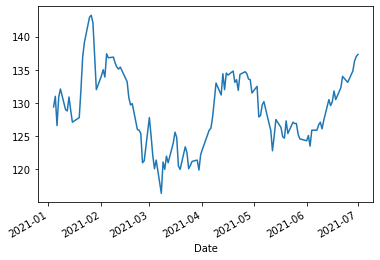

In [158]:
# Plot ...
apple['Close'].plot()

In [159]:
# rolling() ...
apple.rolling(window=3).mean()

,Close
Date,
2021-01-04,NaN
2021-01-05,NaN
2021-01-06,129.000000
2021-01-07,129.500000
2021-01-08,129.866667
...,...
2021-06-25,133.400000
2021-06-28,133.766667
2021-06-29,134.733333


<AxesSubplot:xlabel='Date'>

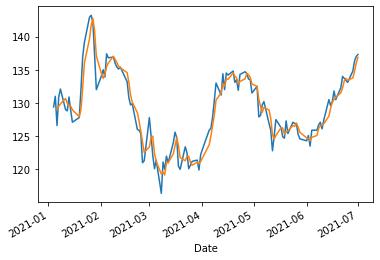

In [160]:
# Plot befor and after the rolling() ...
apple['Close'].plot() # blue line: original
apple['Close'].rolling(window=3).mean().plot() # Moving Average


<AxesSubplot:xlabel='Date'>

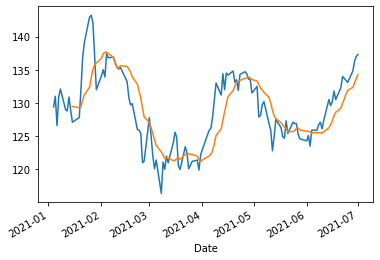

In [161]:
# Plot befor and after the rolling() ...
apple['Close'].plot() # blue line: original
apple['Close'].rolling(window=10).mean().plot() # Moving Average


In [163]:
# Example ...
Air = pd.read_csv('data/AirPassenger.csv',
                  index_col = 'Month',
                  parse_dates = True)

Air.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

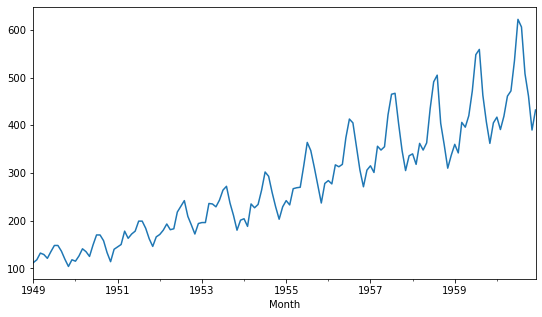

In [165]:
# Plot ...
Air['Passengers'].plot(figsize=(9,5))

<AxesSubplot:xlabel='Month'>

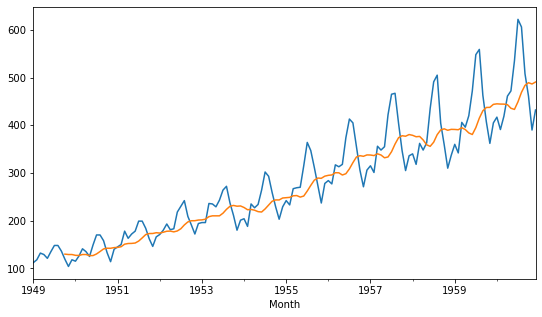

In [170]:
# Plot after aplying 'rolling()' method ...
Air['Passengers'].plot(figsize=(9,5))
Air['Passengers'].rolling(window=10).mean().plot()

# 

# Real World Data Analysis Example

### Housing Dataset Analysis

In [173]:
# Part -1- ... Prepare dataset for statistics modeling/ advanced analysis ...

# setp -1- => understand all variables in the datase.

# setp -2- => exploring the "dependent variable". we will have a deep
              # look at the 'target variable' which is the variable
              # that we are trying to predict
        
# setp -3- => investigate the relationships between the dependent
              # variable and the other independent variables.
    
# setp -4- => cleaning the data, handle missing data, outliers,
              # and categorical variables.
    
# setp -5- => checking statistical assimptions. Check if the data
              # meet assumptions that are required for advanced
              # analysis, for example checking for data normality.

In [ ]:
# Part -2- ...
# Step -1- ...

In [174]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [177]:
# dataset ...
df = pd.read_csv('data/housing.csv')
df.head(3)

# dependent variable: "SalePrice" => You can forcast the future of "SalePrice"

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageArea,SalePrice
0,1,8450,7,2003,856,1710,2,3,Gd,8,548,208500
1,2,9600,6,1976,1262,1262,2,3,TA,6,460,181500
2,3,11250,7,2001,920,1786,2,3,Gd,6,608,223500


In [178]:
# length of the dataset ...
df.shape

(1460, 12)

In [179]:
# General infos about the datset ...
df.info() # check and compare it to the length to see if we have a missing data.
          # dtype: if numerical ok . And if not convert it to numerical variables using "Dummy Variables"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            1460 non-null   int64 
 1   LotArea       1460 non-null   int64 
 2   OverallQual   1460 non-null   int64 
 3   YearBuilt     1460 non-null   int64 
 4   TotalBsmtSF   1460 non-null   int64 
 5   GrLivArea     1460 non-null   int64 
 6   FullBath      1460 non-null   int64 
 7   BedroomAbvGr  1460 non-null   int64 
 8   KitchenQual   1460 non-null   object
 9   TotRmsAbvGrd  1460 non-null   int64 
 10  GarageArea    1460 non-null   int64 
 11  SalePrice     1460 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 137.0+ KB


In [180]:
# Checking the missing values ...
df.isnull().sum() # we don't have a missing values

Id              0
LotArea         0
OverallQual     0
YearBuilt       0
TotalBsmtSF     0
GrLivArea       0
FullBath        0
BedroomAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
GarageArea      0
SalePrice       0
dtype: int64

In [181]:
# Part -3- ...
# Step -2- ...

In [182]:
# descibe statistics for dependent variable "SalePrice" ...
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
# Step -3- ...

In [183]:
# Correlation Matrix ...
df.corr() # We interest to dependent variable "SalePrice"
          # Analysis the correlation "-1 < corr> 1"

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,SalePrice
Id,1.000000,-0.033226,-0.028365,-0.012713,-0.015415,0.008273,0.005587,0.037719,0.027239,0.017634,-0.021917
LotArea,-0.033226,1.000000,0.105806,0.014228,0.260833,0.263116,0.126031,0.119690,0.190015,0.180403,0.263843
OverallQual,-0.028365,0.105806,1.000000,0.572323,0.537808,0.593007,0.550600,0.101676,0.427452,0.562022,0.790982
YearBuilt,-0.012713,0.014228,0.572323,1.000000,0.391452,0.199010,0.468271,-0.070651,0.095589,0.478954,0.522897
TotalBsmtSF,-0.015415,0.260833,0.537808,0.391452,1.000000,0.454868,0.323722,0.050450,0.285573,0.486665,0.613581
GrLivArea,0.008273,0.263116,0.593007,0.199010,0.454868,1.000000,0.630012,0.521270,0.825489,0.468997,0.708624
FullBath,0.005587,0.126031,0.550600,0.468271,0.323722,0.630012,1.000000,0.363252,0.554784,0.405656,0.560664
BedroomAbvGr,0.037719,0.119690,0.101676,-0.070651,0.050450,0.521270,0.363252,1.000000,0.676620,0.065253,0.168213
TotRmsAbvGrd,0.027239,0.190015,0.427452,0.095589,0.285573,0.825489,0.554784,0.676620,1.000000,0.337822,0.533723
GarageArea,0.017634,0.180403,0.562022,0.478954,0.486665,0.468997,0.405656,0.065253,0.337822,1.000000,0.623431


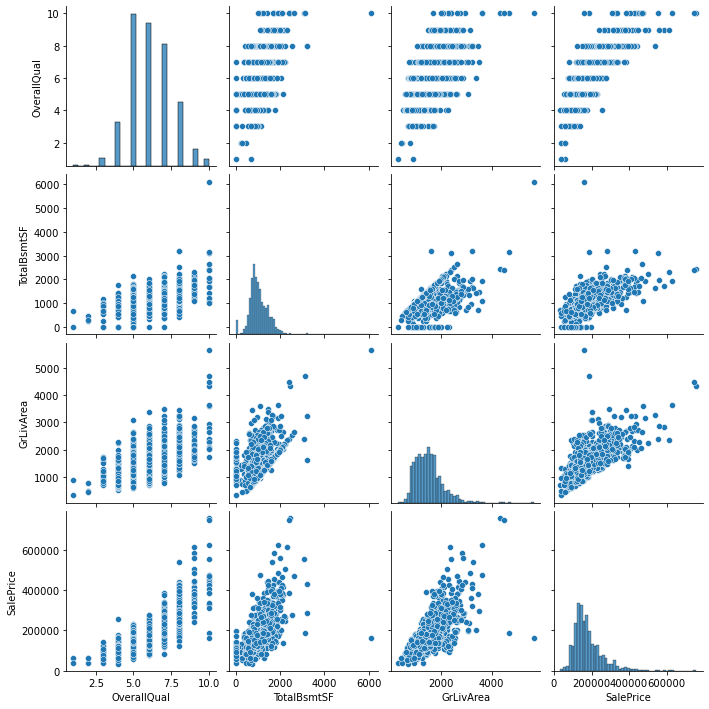

In [185]:
# Plot ...
columns = ['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']
sns.pairplot(df[columns]) # We focus on row four (04).

In [186]:
# setp -4- => cleaning the data, handle missing data, outliers,
              # and categorical variables.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

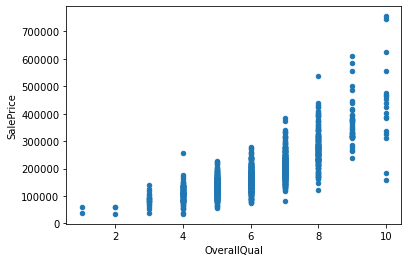

In [187]:
# It is a good adea to create separate plots for each variable.

df.plot.scatter(x='OverallQual',
                y='SalePrice')
# Add the comments about the plot.

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

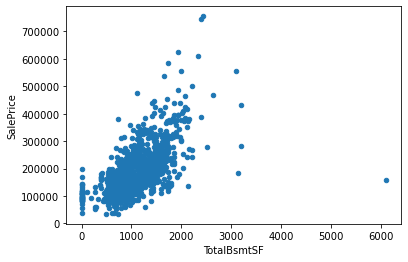

In [188]:
# Relationship between 'TotalBsmtSF' and 'SalePrice'
# We can see Outliers.

df.plot.scatter(x='TotalBsmtSF',
                y='SalePrice')
# Add the comments about the plot.

In [190]:
# Display a specific data with respect to some conditions ...
# Objective behind it is to delete the outliers data ...
df.loc[(df['TotalBsmtSF'] > 3000) & (df['SalePrice'] < 300000)]


,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageArea,SalePrice
332,333,10655,8,2003,3206,1629,2,3,Gd,7,880,284000
523,524,40094,10,2007,3138,4676,3,3,Ex,11,884,184750
1298,1299,63887,10,2008,6110,5642,2,3,Ex,12,1418,160000


In [191]:
# Delete the "outliers" data ...
df = df.drop([332,523,1298])

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

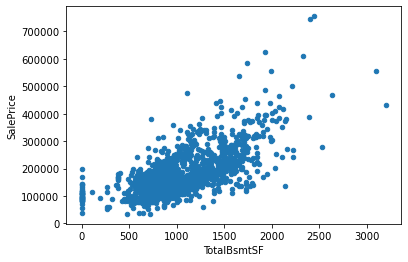

In [192]:
# Create another plot again after droping the "outliers" ...
df.plot.scatter(x='TotalBsmtSF',
                y='SalePrice')

In [193]:
# Check the "correlation" again after deleting the "outliers"

df['TotalBsmtSF'].corr(df['SalePrice'])

0.6529720902241527

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

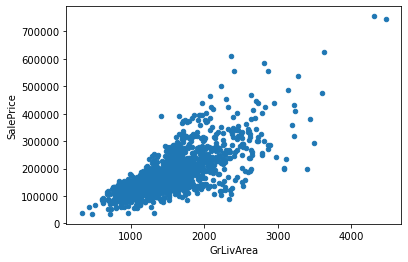

In [194]:
# Ploting the third (3rd) variable ...
df.plot.scatter(x='GrLivArea',
                y='SalePrice') # We don't have "outliers"

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

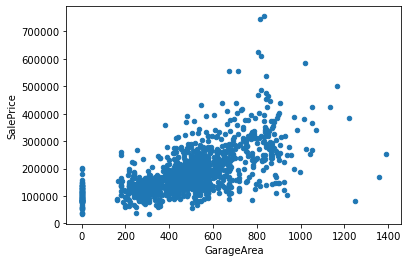

In [195]:
# Ploting the fourth (4th) variable ...
df.plot.scatter(x='GarageArea',
                y='SalePrice') # We have "Outliers" we have to delete them.

In [196]:
# Delete the "outliers from the data" ...
df.loc[(df['GarageArea'] > 1200) & (df['SalePrice'] < 300000)]


,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageArea,SalePrice
581,582,12704,8,2008,2042,2042,2,3,Ex,8,1390,253293
1061,1062,18000,3,1935,894,894,1,2,TA,6,1248,81000
1190,1191,32463,4,1961,1249,1622,1,3,TA,7,1356,168000


In [197]:
# Delete the "outliers" data ...
df = df.drop([581, 1061, 1190])

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

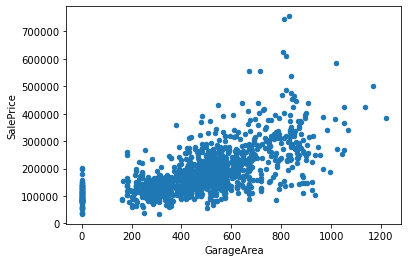

In [198]:
# Ploting again the fourth (4th) variable ...
df.plot.scatter(x='GarageArea',
                y='SalePrice')

In [199]:
# Check the "correlation" again after deleting the "outliers"

df['GarageArea'].corr(df['SalePrice'])

0.6411338199828444

In [200]:
# setp -5- => checking statistical assumptions. Check if the data
              # meet assumptions that are required for advanced
              # analysis, for example checking for data normality.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

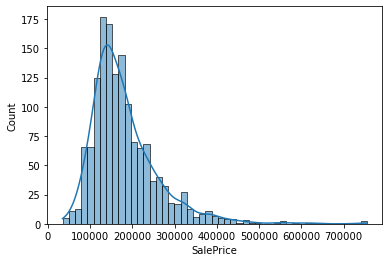

In [202]:
# Check for "Normality" by "Histogram" or "Density Plot" ...

sns.histplot(df['SalePrice'], 
             kde=True) # add a comments about the graphics

((array([-3.30398548, -3.04669486, -2.90360817, ...,  2.90360817,
          3.04669486,  3.30398548]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74176.3532456065, 180889.89202200828, 0.931585733830412))

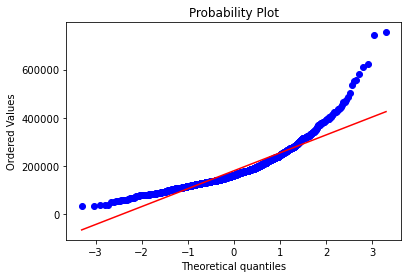

In [203]:
# Probability plot to check the "Normality" ...
stats.probplot(df['SalePrice'],
               plot=plt)
# The Graphic => means the data is "NOt normaly" distributed.

In [204]:
# How to solve theis problem of "Normality" ...
# Using data "Transformation/Square Root Transformation" ...
# Using "log()" fct ...

df['SalePrice'] = np.log(df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

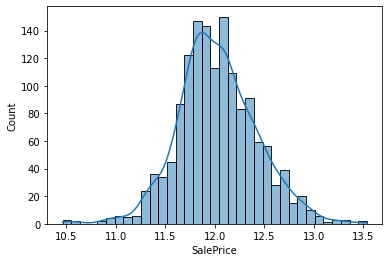

In [205]:
# Check for "Normality" by "Histogram" or "Density Plot" again ...

sns.histplot(df['SalePrice'], 
             kde=True)

((array([-3.30398548, -3.04669486, -2.90360817, ...,  2.90360817,
          3.04669486,  3.30398548]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.398195152659083, 12.023845716834316, 0.9952772349085542))

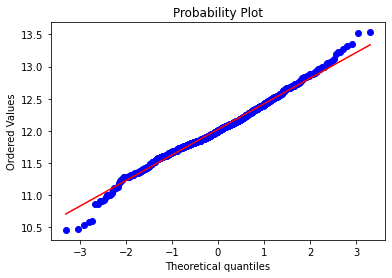

In [206]:
# Probability plot to check the "Normality" again ...
stats.probplot(df['SalePrice'],
               plot=plt)

# Now we solved the problem, so it is "Normaly distribited"

##### Checking the "Density plot" for other variables ...

<AxesSubplot:xlabel='GrLivArea', ylabel='Count'>

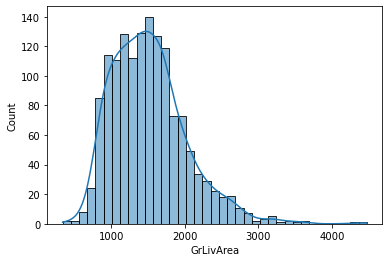

In [207]:
# Checking the "Density plot" for other variables ...
sns.histplot(df['GrLivArea'], 
             kde=True)

((array([-3.30398548, -3.04669486, -2.90360817, ...,  2.90360817,
          3.04669486,  3.30398548]),
  array([ 334,  438,  480, ..., 3627, 4316, 4476], dtype=int64)),
 (495.87446410915817, 1510.365887207703, 0.9743017218385464))

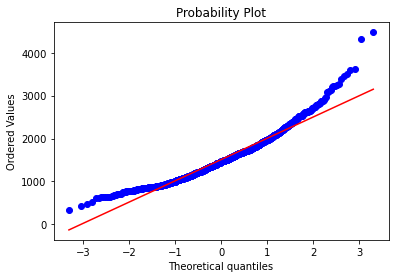

In [208]:
# Probability plot to check the "Normality"  ...
stats.probplot(df['GrLivArea'],
               plot=plt)

# It is " NOT Normaly distribited"

In [209]:
# How to solve theis problem of "Normality" ...
# Using data "Transformation/Square Root Transformation" ...
# Using "log()" fct ...

df['GrLivArea'] = np.log(df['GrLivArea'])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

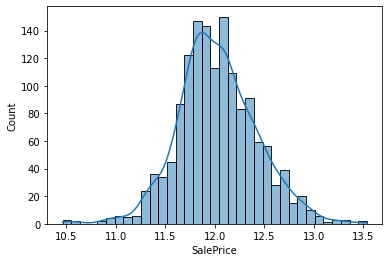

In [210]:
# Check for "Normality" by "Histogram" or "Density Plot" again ...

sns.histplot(df['SalePrice'], 
             kde=True)

((array([-3.30398548, -3.04669486, -2.90360817, ...,  2.90360817,
          3.04669486,  3.30398548]),
  array([5.81114099, 6.08221891, 6.1737861 , ..., 8.19616114, 8.37008433,
         8.40648507])),
 (0.3303910756964251, 7.265927014995005, 0.9981704176655275))

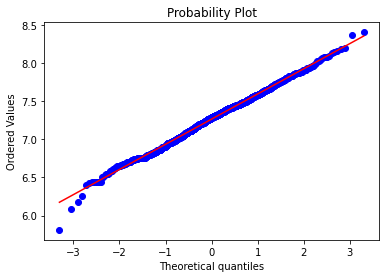

In [212]:
# Probability plot to check the "Normality" again ...
stats.probplot(df['GrLivArea'],
               plot=plt)

# Now we solved the problem, so it is "Normaly distribited"

# 

##### Checking for Categorical Data ...

In [214]:
# Categorical variable "KitchenQual" ...
df['KitchenQual'].value_counts()

# It contains four (04) values ...

TA    733
Gd    585
Ex     97
Fa     39
Name: KitchenQual, dtype: int64

In [215]:
# To analyse it we need to convert it to "Dummy variables" ...
# Using a fct "get_dummies" ...

kitchen = pd.get_dummies(df['KitchenQual'])
kitchen.head()

,Ex,Fa,Gd,TA
0,0,0,1,0
1,0,0,0,1
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [216]:
# Adding it to the DF dataset using "join()" fct   ...
df = df.join(kitchen)
df.head()

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageArea,SalePrice,Ex,Fa,Gd,TA
0,1,8450,7,2003,856,7.444249,2,3,Gd,8,548,12.247694,0,0,1,0
1,2,9600,6,1976,1262,7.140453,2,3,TA,6,460,12.109011,0,0,0,1
2,3,11250,7,2001,920,7.487734,2,3,Gd,6,608,12.317167,0,0,1,0
3,4,9550,7,1915,756,7.448334,1,3,Gd,7,642,11.849398,0,0,1,0
4,5,14260,8,2000,1145,7.695303,2,4,Gd,9,836,12.429216,0,0,1,0


In [217]:
# The "Categorical variable" is not longer needed, so we drop it ...
# from the dataset -DF- ...
df = df.drop(['KitchenQual'], axis=1)
df.head()

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,SalePrice,Ex,Fa,Gd,TA
0,1,8450,7,2003,856,7.444249,2,3,8,548,12.247694,0,0,1,0
1,2,9600,6,1976,1262,7.140453,2,3,6,460,12.109011,0,0,0,1
2,3,11250,7,2001,920,7.487734,2,3,6,608,12.317167,0,0,1,0
3,4,9550,7,1915,756,7.448334,1,3,7,642,11.849398,0,0,1,0
4,5,14260,8,2000,1145,7.695303,2,4,9,836,12.429216,0,0,1,0


### Our Dataset is ready for the Next step  who is application of ML/DL ...

In [221]:
%pwd

'C:\\Users\\xps\\Desktop\\Python'